In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
    return poly_dataframe

In [3]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int,
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float,
              'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int,
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [4]:
sales = pd.read_csv(r"D:\regression\kc_house_data.csv", dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

### degree 1

In [5]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

In [6]:
poly1_data.head()

,power_1,price
19452,290.0,142000.0
15381,370.0,276000.0
860,380.0,245000.0
18379,384.0,265000.0
4868,390.0,228000.0


In [7]:
model1=LinearRegression()

In [8]:
x=poly1_data[['power_1']]
y=poly1_data['price']
model1.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

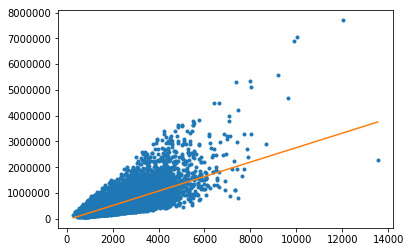

In [9]:
plt.plot(x,y,'.',x, model1.predict(x),'-')

### degree 2

In [10]:
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
poly2_data['price'] = sales['price']
poly2_data.head()

,power_1,power_2,price
19452,290.0,84100.0,142000.0
15381,370.0,136900.0,276000.0
860,380.0,144400.0,245000.0
18379,384.0,147456.0,265000.0
4868,390.0,152100.0,228000.0


In [11]:
model2=LinearRegression()
x=poly2_data[['power_1','power_2']]
y=poly2_data['price']
model2.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

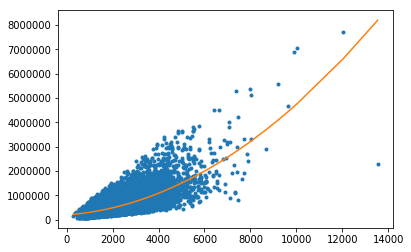

In [12]:
plt.plot(x['power_1'],y,'.',x['power_1'], model2.predict(x),'-')

### degree 3

In [13]:
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
poly3_data['price'] = sales['price']
poly3_data.head()

,power_1,power_2,power_3,price
19452,290.0,84100.0,24389000.0,142000.0
15381,370.0,136900.0,50653000.0,276000.0
860,380.0,144400.0,54872000.0,245000.0
18379,384.0,147456.0,56623104.0,265000.0
4868,390.0,152100.0,59319000.0,228000.0


In [14]:
model3=LinearRegression()
x=poly3_data[['power_1','power_2','power_3']]
y=poly3_data['price']
model3.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

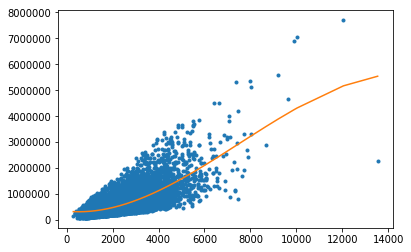

In [15]:
plt.plot(x['power_1'],y,'.',x['power_1'], model3.predict(x),'-')

### degree 15

In [16]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
poly15_data['price'] = sales['price']
poly15_data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
19452,290.0,84100.0,24389000.0,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36,142000.0
15381,370.0,136900.0,50653000.0,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38,276000.0
860,380.0,144400.0,54872000.0,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38,245000.0
18379,384.0,147456.0,56623104.0,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38,265000.0
4868,390.0,152100.0,59319000.0,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38,228000.0


In [17]:
my_features = poly15_data.columns[:-1]

In [18]:
my_features

Index(['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
       'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12',
       'power_13', 'power_14', 'power_15'],
      dtype='object')

In [19]:
model15=LinearRegression()
x=poly15_data[my_features]
y=poly15_data['price']
model15.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

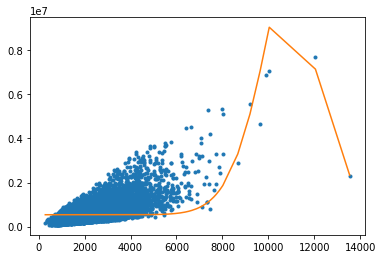

In [20]:
plt.plot(x['power_1'],y,'.',x['power_1'], model15.predict(x),'-')

In [21]:
print(model15.intercept_,model15.coef_)

537116.3296377584 [ 4.56404164e-91  6.91713530e-51 -5.84668843e-56  0.00000000e+00
  0.00000000e+00  2.68575170e-71  2.26147568e-67  1.85900299e-63
  1.47144116e-59  1.09771012e-55  7.43509038e-52  4.23015578e-48
  1.61618577e-44 -2.49283826e-48  9.59718336e-53]


In [22]:
set1 = pd.read_csv(r'D:\regression\kc_house_set_1_data.csv', dtype=dtype_dict)
set1 = set1.sort_values(['sqft_living','price'])
set2 = pd.read_csv(r'D:\regression\kc_house_set_2_data.csv', dtype=dtype_dict)
set2 = set2.sort_values(['sqft_living','price'])
set3 = pd.read_csv(r'D:\regression\kc_house_set_3_data.csv', dtype=dtype_dict)
set3 = set3.sort_values(['sqft_living','price'])
set4 = pd.read_csv(r'D:\regression\kc_house_set_4_data.csv', dtype=dtype_dict)
set4 = set4.sort_values(['sqft_living','price'])

In [23]:
def plot_15degree(df):
    poly15_data = polynomial_dataframe(df['sqft_living'], 15)
    poly15_data['price'] = df['price']
    my_features = poly15_data.columns[:-1]
    model15=LinearRegression()
    x=poly15_data[my_features]
    y=poly15_data['price']
    model15.fit(x,y)
    print(model15.intercept_,model15.coef_)
    plt.plot(x['power_1'],y,'.',x['power_1'], model15.predict(x),'-')

539058.8186684749 [ 3.05794168e-90 -1.69394947e-49 -5.61767588e-55 -4.97841222e-60
  0.00000000e+00  1.10358351e-70  8.37724029e-67  6.23411957e-63
  4.49156442e-59  3.06938763e-55  1.91749300e-51  1.01335180e-47
  3.62176959e-44 -5.63501661e-48  2.18641116e-52]


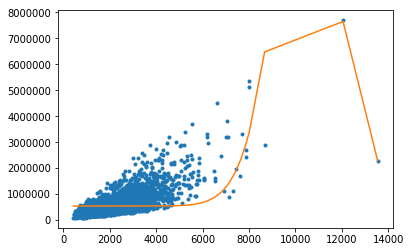

In [24]:
plot_15degree(set1)

506737.75622745766 [ 2.71335949e-77  7.33541092e-39 -1.85014873e-44  8.43742368e-50
  0.00000000e+00  0.00000000e+00  3.64549213e-55  1.50416258e-51
  5.76015665e-48  1.95770497e-44  5.39396539e-41  9.40376360e-38
 -3.63529141e-41  4.65476524e-45 -1.97197311e-49]


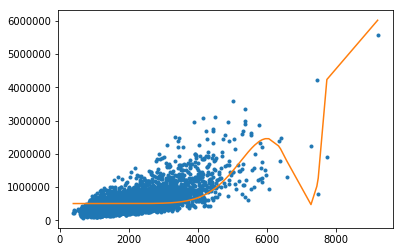

In [25]:
plot_15degree(set2)

530874.3166531883 [ 2.83751934e-88 -7.80224148e-49 -1.38767183e-55  3.98272978e-59
  0.00000000e+00  4.27894986e-69  2.68009626e-65  1.63911362e-61
  9.66435015e-58  5.38044653e-54  2.72563636e-50  1.16253248e-46
  3.33756141e-43 -6.76238818e-47  3.43132932e-51]


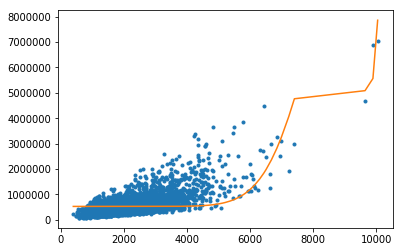

In [26]:
plot_15degree(set3)

494817.00363715156 [ 1.37116050e-76  2.79678201e-40 -2.13063569e-44 -5.68255825e-49
  0.00000000e+00  0.00000000e+00  1.27070051e-54  4.87868972e-51
  1.73549022e-47  5.47058320e-44  1.39587599e-40  2.25041871e-37
 -9.43954119e-41  1.31573060e-44 -6.09163273e-49]


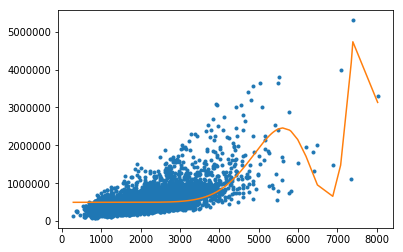

In [27]:
plot_15degree(set4)

In [28]:
train_data = pd.read_csv(r'D:\regression\kc_house_train_data.csv', dtype=dtype_dict)
train_data = train_data.sort_values(['sqft_living','price'])
valid_data = pd.read_csv(r'D:\regression\kc_house_valid_data.csv', dtype=dtype_dict)
valid_data = valid_data.sort_values(['sqft_living','price'])
test_data = pd.read_csv(r'D:\regression\kc_house_test_data.csv', dtype=dtype_dict)
test_data = test_data.sort_values(['sqft_living','price'])

In [29]:
def plot_degree(data1, data2, degree):
    poly_data = polynomial_dataframe(data1['sqft_living'], degree)
    valid_data = polynomial_dataframe(data2['sqft_living'], degree)
    my_features = poly_data.columns
    poly_data['price'] = data1['price']
    valid_data['price'] = data2['price']
    model = LinearRegression()
    x=poly_data[my_features]
    y=poly_data['price']
    model.fit(x,y)
    rss_valid= np.sum((model.predict(valid_data[my_features]) - valid_data['price'])**2)
    return rss_valid

In [30]:
range_list = []
for i in range(1,16):
    range_list.append((plot_degree(train_data, valid_data, i),i))

In [31]:
min(range_list)

(566268587982892.0, 6)

In [32]:
plot_degree(train_data, test_data, 6)

135225114351908.31